In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)

import matplotlib
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
['NanumBarunGothic',
'NanumMyeongjo',
'NanumMyeongjo',
'NanumGothic',
'NanumBarunGothic',
'NanumGothic']

import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [3]:
df = pd.read_csv('data.csv')
df

,lot_id,tray_id,rta1_tat,hta1_tat,rta2_tat,ocv1_tat,c1_tat,dc1_tat,c2_tat,dc2_tat,...,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an,result
0,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.6,5.0,6.8,4709.0,37583.0,92.0,626.0,109.0,0
1,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3760.4,5.1,6.8,4712.0,37591.0,92.0,606.0,5.0,0
2,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3760.4,4.9,6.7,4737.0,37594.0,92.0,566.0,-10.0,0
3,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.0,5.1,6.9,4709.0,37578.0,92.0,606.0,111.0,0
4,LOT-100,TRAY-1002,217709,86476,4524,118,3580,405,453,405,...,10단,3759.0,5.0,6.7,4706.0,37577.0,93.0,606.0,-38.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31014,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,13단,3759.2,5.3,7.2,4745.0,37583.0,94.0,643.0,-35.0,0
31015,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,13단,3759.2,5.3,7.1,4746.0,37583.0,94.0,620.0,89.0,0
31016,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,13단,3760.3,5.2,7.0,4782.0,37595.0,92.0,597.0,-23.0,0
31017,LOT-144,TRAY-2791,152836,87334,156490,118,3553,405,451,405,...,13단,3760.0,5.3,7.0,4751.0,37590.0,95.0,620.0,3.0,0


## temp_RF

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Extract relevant columns
columns_of_interest = [
    'c1_temp_avg', 'dc1_temp_avg', 'c2_temp_avg', 'dc2_temp_avg',
    'c3_temp_avg', 'dc3_temp_avg', 'c4_temp_avg', 'pg1_temp_avg', 'result'
]

# Filter the data for the relevant columns
data_filtered = df[columns_of_interest]

# Check for missing values
missing_values = data_filtered.isnull().sum()

# Split the data into features and target variable
X = data_filtered.drop('result', axis = 1)
y = data_filtered['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 1234)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state = 1234)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}
print(results)

{'Accuracy': 0.965183752417795, 'Precision': 0.4297520661157025, 'Recall': 0.16938110749185667, 'F1 Score': 0.24299065420560748}


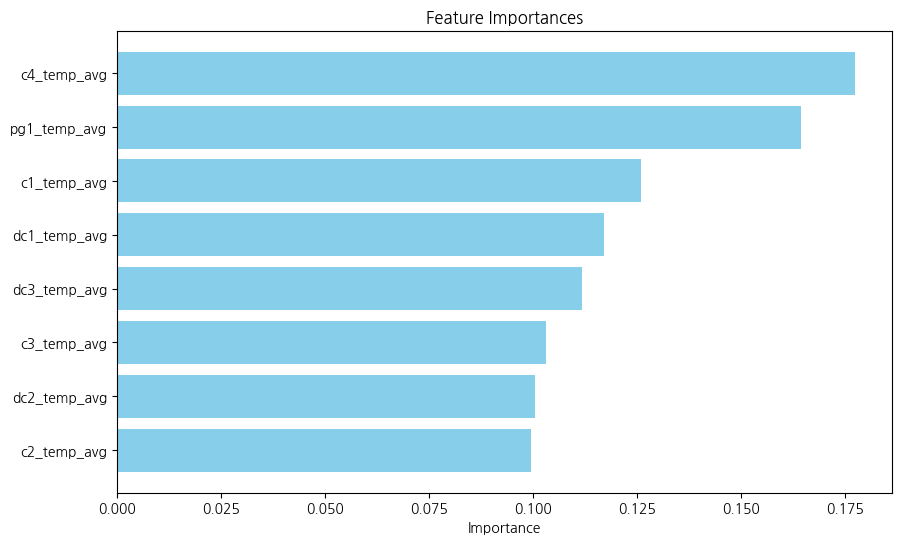

In [53]:
import matplotlib.pyplot as plt

feature_importances = classifier.feature_importances_

# Create a DataFrame to display the feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## temp_GB

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state = 1234)
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

# Display the results
gb_results = {
    'Accuracy': accuracy_gb,
    'Precision': precision_gb,
    'Recall': recall_gb,
    'F1 Score': f1_gb
}

print("Gradient Boosting Model Evaluation Results:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")


Gradient Boosting Model Evaluation Results:
Accuracy: 0.9664
Precision: 0.4464
Recall: 0.0814
F1 Score: 0.1377


In [55]:
# Get feature importances from the Gradient Boosting model
gb_feature_importances = gb_classifier.feature_importances_

# Create a DataFrame to display the feature importances
gb_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
gb_features_df

,Feature,Importance
6,c4_temp_avg,0.282683
1,dc1_temp_avg,0.214231
7,pg1_temp_avg,0.160349
0,c1_temp_avg,0.108063
5,dc3_temp_avg,0.092316
2,c2_temp_avg,0.063588
4,c3_temp_avg,0.046997
3,dc2_temp_avg,0.031773


## temp_XGB

In [56]:
from xgboost import XGBClassifier

# Train an XGBoost Classifier with limited boosting rounds for faster training
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state = 1234)
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Display the results
xgb_results = {
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1 Score': f1_xgb
}

print("XGBoost Model Evaluation Results:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")

XGBoost Model Evaluation Results:
Accuracy: 0.9650
Precision: 0.4252
Recall: 0.1759
F1 Score: 0.2488


In [57]:
# Get feature importances from the Gradient Boosting model
xgb_feature_importances = xgb_classifier.feature_importances_

# Create a DataFrame to display the feature importances
xgb_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
xgb_features_df

,Feature,Importance
1,dc1_temp_avg,0.277777
6,c4_temp_avg,0.121941
2,c2_temp_avg,0.121319
0,c1_temp_avg,0.116432
7,pg1_temp_avg,0.112886
4,c3_temp_avg,0.099320
3,dc2_temp_avg,0.075707
5,dc3_temp_avg,0.074619


## temp_DT

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1234)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display the results
dt_results = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1 Score': f1_dt
}

dt_results

{'Accuracy': 0.9649688373092629,
 'Precision': 0.4251968503937008,
 'Recall': 0.1758957654723127,
 'F1 Score': 0.2488479262672811}

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1234)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Display the results
dt_results = {
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1 Score': f1_dt
}

print("Decision Tree Model Evaluation Results:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")


Decision Tree Model Evaluation Results:
Accuracy: 0.9650
Precision: 0.4252
Recall: 0.1759
F1 Score: 0.2488


In [60]:
# Get feature importances from the Decision Tree model
dt_feature_importances = dt_classifier.feature_importances_

# Create a DataFrame to display the feature importances
dt_features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
dt_features_df

,Feature,Importance
6,c4_temp_avg,0.254400
7,pg1_temp_avg,0.175023
0,c1_temp_avg,0.172329
1,dc1_temp_avg,0.148548
4,c3_temp_avg,0.102603
3,dc2_temp_avg,0.058285
2,c2_temp_avg,0.046143
5,dc3_temp_avg,0.042668


## Charging / Discharging_RF

In [41]:
cd_columns = ['c1_curr_end', 'c1_voltage_avg', 'c1_capa', 'c1_ccval', 'c1_time_cc', 'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa', 'dc1_temp_avg', 'dc1_capafit',
'c2_curr_end', 'c2_voltage_avg', 'c2_capa', 'c2_ccval','c2_time_cc','c2_temp_avg','dc2_curr_end','dc2_voltage_avg',
              'dc2_capa','dc2_temp_avg','dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa','c3_ccval','c3_time_cv','c3_cvval','c3_time_cc'
              ,'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa','dc3_temp_avg','dc3_capafit','c4_curr_end','c4_voltage_avg','c4_capa',
              'c4_ccval','c4_time_cv','c4_cvval','c4_time_cc','c4_temp_avg', 'result']

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Filter the data for the relevant columns
data_filtered = df[cd_columns]

# Check for missing values
missing_values = data_filtered.isnull().sum()

# Split the data into features and target variable
X = data_filtered.drop('result', axis = 1)
y = data_filtered['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 1234)

# Train a Random Forest Classifier
classifier = RandomForestClassifier(random_state = 1234)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
results = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
}
print(results)

{'Accuracy': 0.9676552761659145, 'Precision': 0.56, 'Recall': 0.09120521172638436, 'F1 Score': 0.1568627450980392}


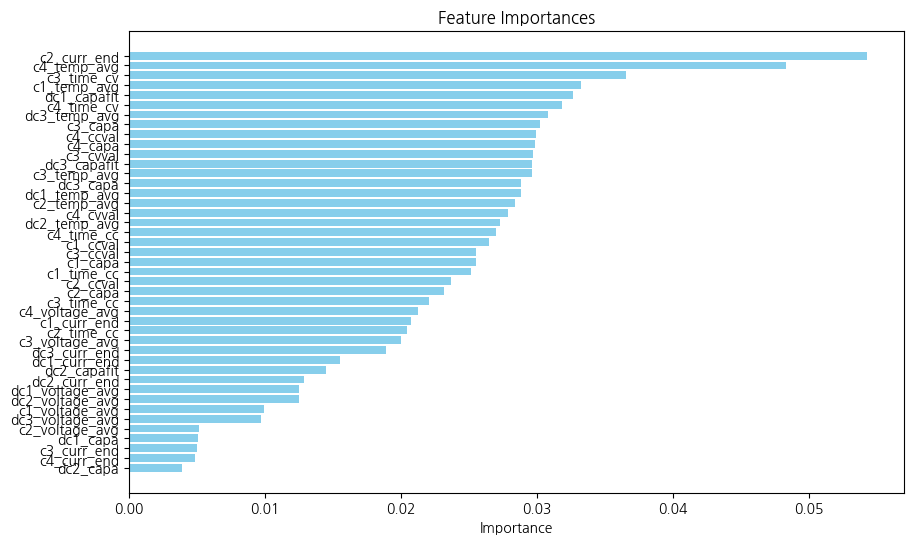

In [62]:
import matplotlib.pyplot as plt

feature_importances = classifier.feature_importances_

# Create a DataFrame to display the feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## Charging / Discharging_GB

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score


# Extract specified columns
cd_columns = ['c1_curr_end', 'c1_voltage_avg', 'c1_capa', 'c1_ccval', 'c1_time_cc', 'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa', 'dc1_temp_avg', 'dc1_capafit',
'c2_curr_end', 'c2_voltage_avg', 'c2_capa', 'c2_ccval','c2_time_cc','c2_temp_avg','dc2_curr_end','dc2_voltage_avg',
              'dc2_capa','dc2_temp_avg','dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa','c3_ccval','c3_time_cv','c3_cvval','c3_time_cc'
              ,'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa','dc3_temp_avg','dc3_capafit','c4_curr_end','c4_voltage_avg','c4_capa',
              'c4_ccval','c4_time_cv','c4_cvval','c4_time_cc','c4_temp_avg', 'result']

selected_data = df[cd_columns]

# Drop rows with missing values
selected_data = selected_data.dropna()

# Separate features and target
X = selected_data.drop('result', axis=1)
y = selected_data['result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=1234)

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.9681925639372448
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8999
           1       0.58      0.13      0.22       307

    accuracy                           0.97      9306
   macro avg       0.77      0.57      0.60      9306
weighted avg       0.96      0.97      0.96      9306



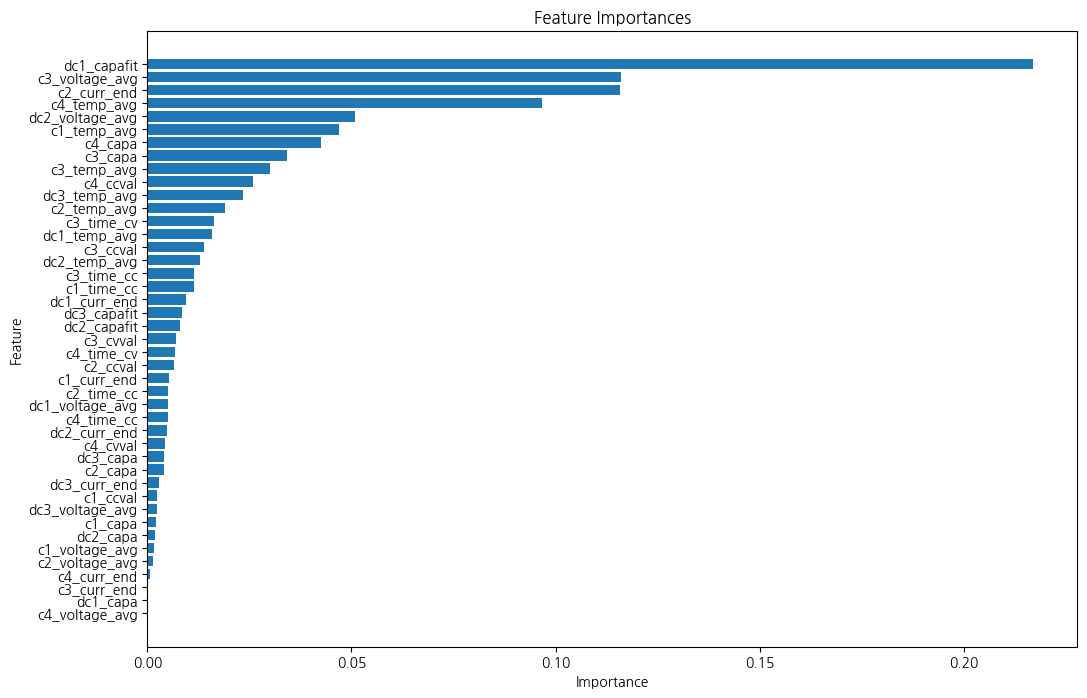

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Extract specified columns
cd_columns = ['c1_curr_end', 'c1_voltage_avg', 'c1_capa', 'c1_ccval', 'c1_time_cc', 'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa', 'dc1_temp_avg', 'dc1_capafit',
'c2_curr_end', 'c2_voltage_avg', 'c2_capa', 'c2_ccval','c2_time_cc','c2_temp_avg','dc2_curr_end','dc2_voltage_avg',
              'dc2_capa','dc2_temp_avg','dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa','c3_ccval','c3_time_cv','c3_cvval','c3_time_cc'
              ,'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa','dc3_temp_avg','dc3_capafit','c4_curr_end','c4_voltage_avg','c4_capa',
              'c4_ccval','c4_time_cv','c4_cvval','c4_time_cc','c4_temp_avg', 'result']

selected_data = df[cd_columns]

# Drop rows with missing values
selected_data = selected_data.dropna()

# Separate features and target
X = selected_data.drop('result', axis=1)
y = selected_data['result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=1234)

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


## Charging / Discharging_XGB

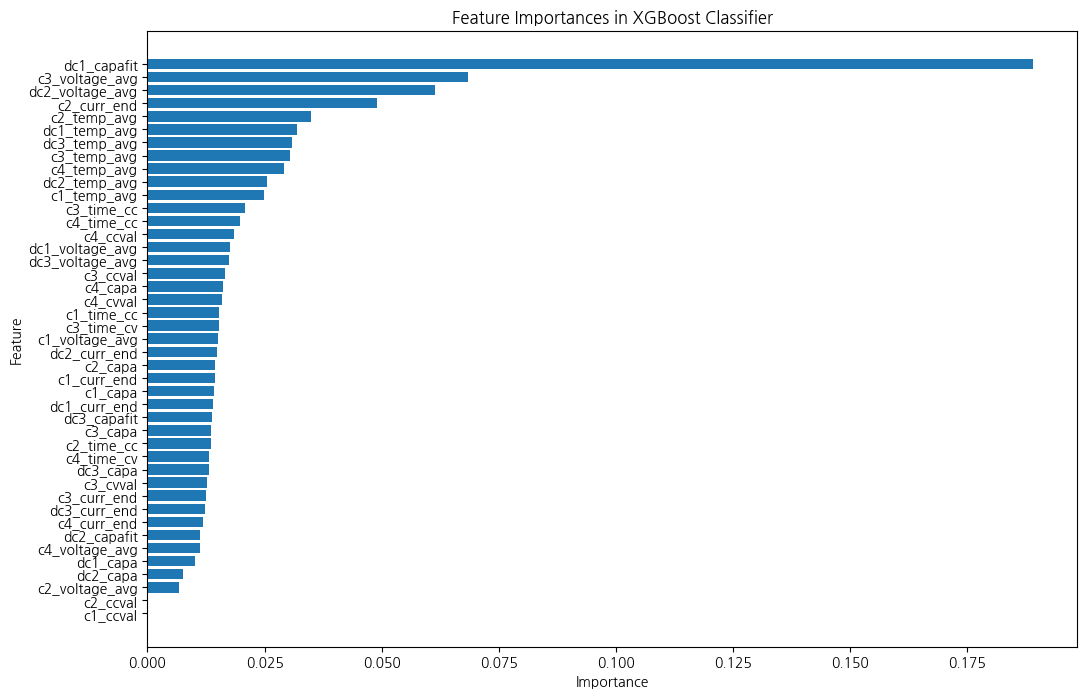

Accuracy: 0.9671179883945842
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8999
           1       0.50      0.25      0.33       307

    accuracy                           0.97      9306
   macro avg       0.74      0.62      0.66      9306
weighted avg       0.96      0.97      0.96      9306



In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


# Extract specified columns
cd_columns = ['c1_curr_end', 'c1_voltage_avg', 'c1_capa', 'c1_ccval', 'c1_time_cc', 'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa', 'dc1_temp_avg', 'dc1_capafit',
'c2_curr_end', 'c2_voltage_avg', 'c2_capa', 'c2_ccval','c2_time_cc','c2_temp_avg','dc2_curr_end','dc2_voltage_avg',
              'dc2_capa','dc2_temp_avg','dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa','c3_ccval','c3_time_cv','c3_cvval','c3_time_cc'
              ,'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa','dc3_temp_avg','dc3_capafit','c4_curr_end','c4_voltage_avg','c4_capa',
              'c4_ccval','c4_time_cv','c4_cvval','c4_time_cc','c4_temp_avg', 'result']

selected_data = df[cd_columns]

# Drop rows with missing values
selected_data = selected_data.dropna()

# Separate features and target
X = selected_data.drop('result', axis=1)
y = selected_data['result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=1234)

# Initialize and train the XGBoost Classifier
model = XGBClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in XGBoost Classifier')
plt.gca().invert_yaxis()
plt.show()

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


## Charging / Discharging_DT

Accuracy: 0.9548678272082527
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      8999
           1       0.34      0.38      0.36       307

    accuracy                           0.95      9306
   macro avg       0.66      0.68      0.67      9306
weighted avg       0.96      0.95      0.96      9306



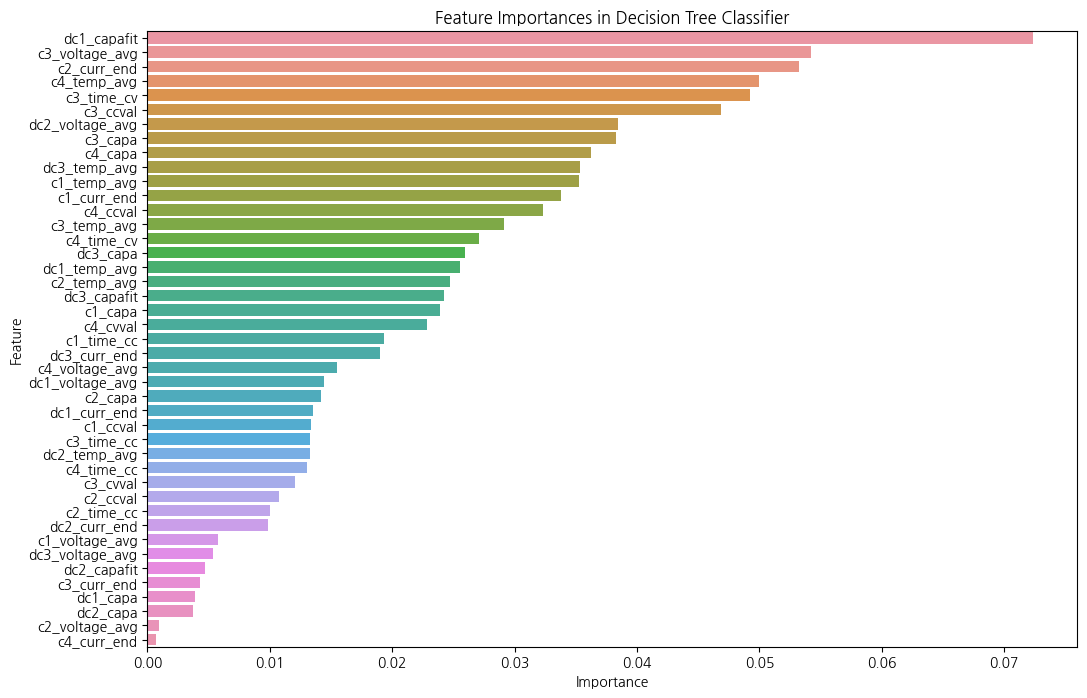

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Extract specified columns
cd_columns = ['c1_curr_end', 'c1_voltage_avg', 'c1_capa', 'c1_ccval', 'c1_time_cc', 'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg', 'dc1_capa', 'dc1_temp_avg', 'dc1_capafit',
'c2_curr_end', 'c2_voltage_avg', 'c2_capa', 'c2_ccval','c2_time_cc','c2_temp_avg','dc2_curr_end','dc2_voltage_avg',
              'dc2_capa','dc2_temp_avg','dc2_capafit','c3_curr_end','c3_voltage_avg','c3_capa','c3_ccval','c3_time_cv','c3_cvval','c3_time_cc'
              ,'c3_temp_avg','dc3_curr_end','dc3_voltage_avg','dc3_capa','dc3_temp_avg','dc3_capafit','c4_curr_end','c4_voltage_avg','c4_capa',
              'c4_ccval','c4_time_cv','c4_cvval','c4_time_cc','c4_temp_avg', 'result']

selected_data = df[cd_columns]

# Drop rows with missing values
selected_data = selected_data.dropna()

# Separate features and target
X = selected_data.drop('result', axis=1)
y = selected_data['result']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=1234)

# Initialize and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=1234)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Classifier')
plt.show()
